# Credit Default Detection 

**Project Description**
Determine Factors for default risk given data 


## Data 

**Description**

Contains information about Taiwanese credit card clients from April 2005 -- September 2005

**Source** 

https://www.kaggle.com/datasets/uciml/default-of-credit-card-clients-dataset

Lichman, M. (2013). UCI Machine Learning Repository. Irvine, CA: University of California, School of Information and Computer Science.

**Variables** 

- ID: ID of each client
- LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
- SEX: Gender (1=male, 2=female)
- EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
- MARRIAGE: Marital status (1=married, 2=single, 3=others)
- AGE: Age in years
- PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
- PAY_2: Repayment status in August, 2005 (scale same as above)
- PAY_3: Repayment status in July, 2005 (scale same as above)
- PAY_4: Repayment status in June, 2005 (scale same as above)
- PAY_5: Repayment status in May, 2005 (scale same as above)
- PAY_6: Repayment status in April, 2005 (scale same as above)
- PAY_n value of 0 means customer paid the minimum due amount, but not the entire balance. I.e., the customer paid enough for their account to remain in good standing, but did revolve a balance
- PAY_n value of -2 balance paid in full and no transactions this period (we may refer to this credit card account as having been 'inactive' this period)

- BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
- BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
- BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
- BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
- BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
- BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
- PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
- PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
- PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
- PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
- PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
- PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar) 
- default.payment.next.month: Default payment (1=yes, 0=no)

## Importing Dependencies

In [1]:
import numpy as np 
import pandas as pd 
import plotly.express as px 
import seaborn as sns 
from scipy import stats
from sklearn import model_selection, metrics, naive_bayes, tree,ensemble
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

## DataFrame

In [2]:
df = pd.read_csv('UCI_Credit_Card.csv')

In [3]:
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,0,0,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,0,0,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,0,0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,0,-1,-1645.0,78379.0,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

Looks like there's no Nan values

## Demographics

<AxesSubplot:xlabel='AGE', ylabel='Count'>

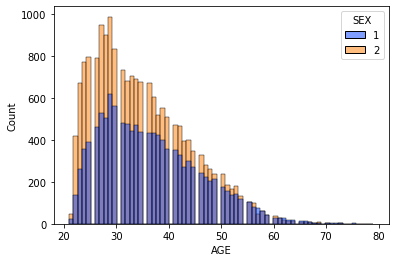

In [5]:
sns.histplot(x='AGE',data=df[['SEX','AGE']],hue='SEX',palette='bright')

## Correlation

In [6]:
df.corr()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
ID,1.000000,0.026179,0.018497,0.039177,-0.029079,0.018678,-0.030575,-0.011215,-0.018494,-0.002735,-0.022199,-0.020270,0.019389,0.017982,0.024354,0.040351,0.016705,0.016730,0.009742,0.008406,0.039151,0.007793,0.000652,0.003000,-0.013952
LIMIT_BAL,0.026179,1.000000,0.024755,-0.219161,-0.108139,0.144713,-0.271214,-0.296382,-0.286123,-0.267460,-0.249411,-0.235195,0.285430,0.278314,0.283236,0.293988,0.295562,0.290389,0.195236,0.178408,0.210167,0.203242,0.217202,0.219595,-0.153520
SEX,0.018497,0.024755,1.000000,0.014232,-0.031389,-0.090874,-0.057643,-0.070771,-0.066096,-0.060173,-0.055064,-0.044008,-0.033642,-0.031183,-0.024563,-0.021880,-0.017005,-0.016733,-0.000242,-0.001391,-0.008597,-0.002229,-0.001667,-0.002766,-0.039961
EDUCATION,0.039177,-0.219161,0.014232,1.000000,-0.143464,0.175061,0.105364,0.121566,0.114025,0.108793,0.097520,0.082316,0.023581,0.018749,0.013002,-0.000451,-0.007567,-0.009099,-0.037456,-0.030038,-0.039943,-0.038218,-0.040358,-0.037200,0.028006
MARRIAGE,-0.029079,-0.108139,-0.031389,-0.143464,1.000000,-0.414170,0.019917,0.024199,0.032688,0.033122,0.035629,0.034345,-0.023472,-0.021602,-0.024909,-0.023344,-0.025393,-0.021207,-0.005979,-0.008093,-0.003541,-0.012659,-0.001205,-0.006641,-0.024339
AGE,0.018678,0.144713,-0.090874,0.175061,-0.414170,1.000000,-0.039447,-0.050148,-0.053048,-0.049722,-0.053826,-0.048773,0.056239,0.054283,0.053710,0.051353,0.049345,0.047613,0.026147,0.021785,0.029247,0.021379,0.022850,0.019478,0.013890
PAY_0,-0.030575,-0.271214,-0.057643,0.105364,0.019917,-0.039447,1.000000,0.672164,0.574245,0.538841,0.509426,0.474553,0.187068,0.189859,0.179785,0.179125,0.180635,0.176980,-0.079269,-0.070101,-0.070561,-0.064005,-0.058190,-0.058673,0.324794
PAY_2,-0.011215,-0.296382,-0.070771,0.121566,0.024199,-0.050148,0.672164,1.000000,0.766552,0.662067,0.622780,0.575501,0.234887,0.235257,0.224146,0.222237,0.221348,0.219403,-0.080701,-0.058990,-0.055901,-0.046858,-0.037093,-0.036500,0.263551
PAY_3,-0.018494,-0.286123,-0.066096,0.114025,0.032688,-0.053048,0.574245,0.766552,1.000000,0.777359,0.686775,0.632684,0.208473,0.237295,0.227494,0.227202,0.225145,0.222327,0.001295,-0.066793,-0.053311,-0.046067,-0.035863,-0.035861,0.235253
PAY_4,-0.002735,-0.267460,-0.060173,0.108793,0.033122,-0.049722,0.538841,0.662067,0.777359,1.000000,0.819835,0.716449,0.202812,0.225816,0.244983,0.245917,0.242902,0.239154,-0.009362,-0.001944,-0.069235,-0.043461,-0.033590,-0.026565,0.216614


<AxesSubplot:>

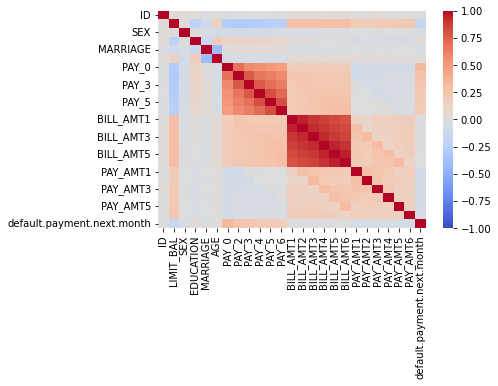

In [7]:
sns.heatmap(df.corr(),vmax=1,vmin=-1,cmap='coolwarm')

We have to deal with variables PAY_0 ... PAY_n, BILL_AMT1 ... BILL_AMTn, and PAY_AMT1 .. PAY_AMTn to deal with colinearity.

## Data Processing 

## Categorical Variables
 
We will use a *p* value of 0.05 to evaluate statistical significance.

In [8]:
education_crosstab = pd.crosstab(df['EDUCATION'], df['default.payment.next.month'])
education_crosstab

default.payment.next.month,0,1
EDUCATION,,
0,14,0
1,8549,2036
2,10700,3330
3,3680,1237
4,116,7
5,262,18
6,43,8


[Text(0.5, 1.0, 'Total Defaulted by Education Level')]

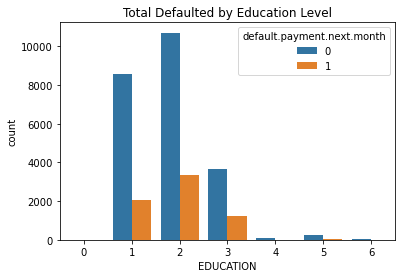

In [9]:
sns.countplot(x="EDUCATION", data=df[['EDUCATION','default.payment.next.month']],hue='default.payment.next.month').set(title='Total Defaulted by Education Level')

We see that those who are of university level education default the most.

In [10]:
stats.chi2_contingency(education_crosstab)

(163.21655786997073,
 1.2332626245415605e-32,
 6,
 array([[1.0903200e+01, 3.0968000e+00],
        [8.2435980e+03, 2.3414020e+03],
        [1.0926564e+04, 3.1034360e+03],
        [3.8293596e+03, 1.0876404e+03],
        [9.5792400e+01, 2.7207600e+01],
        [2.1806400e+02, 6.1936000e+01],
        [3.9718800e+01, 1.1281200e+01]]))

The null and alternative hypothesis are:

* $H_0$: = The number of approved applications is statistically independent on Education
* $H_1$: = The number of approved applications is statistically dependent on Education

 1.2332626245415605e-32 < 0.05 so we reject the null hypothesis that the number of approved applications is statistically independent on Education 

In [11]:
relationship_crosstab = pd.crosstab(df['MARRIAGE'], df['default.payment.next.month'])
relationship_crosstab

default.payment.next.month,0,1
MARRIAGE,,
0,49,5
1,10453,3206
2,12623,3341
3,239,84


[Text(0.5, 1.0, 'Total Defaulted by Relationship Status')]

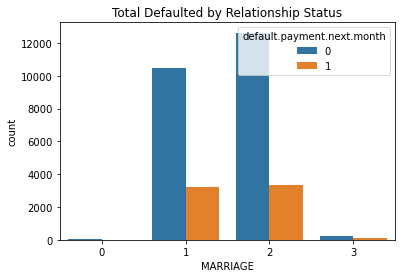

In [12]:
sns.countplot(x="MARRIAGE", data=df[['MARRIAGE','default.payment.next.month']],hue='default.payment.next.month').set(title='Total Defaulted by Relationship Status')

Those who are single default more than those who are married.

In [13]:
stats.chi2_contingency(relationship_crosstab)

(35.66239583433609,
 8.825862457577375e-08,
 3,
 array([[4.20552000e+01, 1.19448000e+01],
        [1.06376292e+04, 3.02137080e+03],
        [1.24327632e+04, 3.53123680e+03],
        [2.51552400e+02, 7.14476000e+01]]))

The null and alternative hypothesis are:

* $H_0$: = The number of approved applications is statistically independent on marriage status
* $H_1$: = The number of approved applications is statistically dependent on marriage status

8.825862457577375e-08 < 0.05 so we reject the null hypothesis that the number of approved applications is statistically independent on Education 

## Dealing EDUCATION and MARRIAGE Columns

We replace the numerical education level as strings. Education level with 0,5,6 have been combined into a single column as 'unknown_edu'. 

In [14]:
df['EDUCATION'] = df['EDUCATION'].replace([1,2,3,4,5,6,0],['graduate school', 'university', 'high school', 'others', 'unknown_edu', 'unknown_edu1','unknown_edu2'])

In [15]:
education_dummies = pd.get_dummies(df.EDUCATION)
education_dummies['others'] = education_dummies['others'] + education_dummies['unknown_edu'] + education_dummies['unknown_edu1'] + education_dummies['unknown_edu2'] 
education_dummies = education_dummies.drop(['unknown_edu1','unknown_edu2'],axis='columns')

In [16]:
education_dummies

,graduate school,high school,others,university,unknown_edu
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
29995,0,1,0,0,0
29996,0,1,0,0,0
29997,0,0,0,1,0
29998,0,1,0,0,0


We replace the numerical values associated with a particular relationshup status level. Relationship status with 3 and 0 have been combined into a single column as 'other_relationship_status'. 

In [17]:
df['MARRIAGE'] = df['MARRIAGE'].replace([1,2,3,0],['Married','Single','Other_marriage1','Other_marriage2'])

In [18]:
marriage_dummies = pd.get_dummies(df.MARRIAGE)
marriage_dummies['other_relationship_status'] = marriage_dummies['Other_marriage1'] + marriage_dummies['Other_marriage2']
marriage_dummies = marriage_dummies.drop(['Other_marriage1','Other_marriage2'],axis='columns')

In [19]:
marriage_dummies

,Married,Single,other_relationship_status
0,1,0,0
1,0,1,0
2,0,1,0
3,1,0,0
4,1,0,0
...,...,...,...
29995,1,0,0
29996,0,1,0
29997,0,1,0
29998,1,0,0


To avoid bias we disregard classification variable SEX and disregard ID. 

In [20]:
df.drop(['ID','SEX'],axis='columns',inplace=True)

## Dealing with Columns PAY_0 ... PAY_n

to deal with the values across the columns PAY_0 ... PAY_n we combine the all the columns into a column named repayment_score. The lower your score, the better since the values in these columns classify whether the client payed on time, payed the minimum, was inactive, or was late by a number of months. 

In [21]:
repayment_score = df[['PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]
repayment_score['repayment_score'] = repayment_score.sum(axis=1)
repayment_score = repayment_score.drop(['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6'],axis=1) 

/tmp/ipykernel_522/2917370967.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  repayment_score['repayment_score'] = repayment_score.sum(axis=1)


In [22]:
repayment_score

,repayment_score
0,-2
1,3
2,0
3,0
4,-2
...,...
29995,0
29996,-4
29997,8
29998,-1


## Outstanding Payments

To reduce collinearity we the sum of columns BILL_AMT1... BILL_AMTn and PAY_AMT1 ... PAY_AMTn. We take the total of the BILL_AMT columns and PAY_AMT columns and do the following calculation:

$$TTL_{BILLAMOUNT} - TTL_{PAYAMOUNT} = \text{OUTSTANDING PAYMENT}$$

In [23]:
bill = ['BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
pay = ['PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

def sub(bill,pay):
    mt = []
    for elt1,elt2 in zip(bill,pay):
        mt.append(df[elt1] - df[elt2])
    return mt

outstanding_payments = pd.DataFrame(sub(bill,pay)).transpose()
outstanding_payments.columns = ['outstanding_0','outstanding_2','outstanding_3','outstanding_4','outstanding_5','outstanding_6',]

In [24]:
outstanding_payments

,outstanding_0,outstanding_2,outstanding_3,outstanding_4,outstanding_5,outstanding_6
0,3913.0,2413.0,689.0,0.0,0.0,0.0
1,2682.0,725.0,1682.0,2272.0,3455.0,1261.0
2,27721.0,12527.0,12559.0,13331.0,13948.0,10549.0
3,44990.0,46214.0,48091.0,27214.0,27890.0,28547.0
4,6617.0,-31011.0,25835.0,11940.0,18457.0,18452.0
...,...,...,...,...,...,...
29995,180448.0,172815.0,203362.0,84957.0,26237.0,14980.0
29996,-154.0,-1698.0,-5496.0,8850.0,5190.0,0.0
29997,3565.0,3356.0,-19242.0,16678.0,18582.0,16257.0
29998,-87545.0,74970.0,75126.0,50848.0,-41109.0,47140.0


In [25]:
df = pd.concat([df,repayment_score,education_dummies,outstanding_payments,marriage_dummies],axis='columns')
df = df.drop(['PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6','EDUCATION','MARRIAGE','BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6','PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],axis='columns')

In [26]:
df = df[['LIMIT_BAL', 'AGE','repayment_score',
       'graduate school', 'high school', 'others', 'university', 'unknown_edu',
       'Married', 'Single', 'other_relationship_status','outstanding_0', 'outstanding_2', 'outstanding_3', 'outstanding_4',
       'outstanding_5', 'outstanding_6','default.payment.next.month']]

In [27]:
# Final DataFrame
df

,LIMIT_BAL,AGE,repayment_score,graduate school,high school,others,university,unknown_edu,Married,Single,other_relationship_status,outstanding_0,outstanding_2,outstanding_3,outstanding_4,outstanding_5,outstanding_6,default.payment.next.month
0,20000.0,24,-2,0,0,0,1,0,1,0,0,3913.0,2413.0,689.0,0.0,0.0,0.0,1
1,120000.0,26,3,0,0,0,1,0,0,1,0,2682.0,725.0,1682.0,2272.0,3455.0,1261.0,1
2,90000.0,34,0,0,0,0,1,0,0,1,0,27721.0,12527.0,12559.0,13331.0,13948.0,10549.0,0
3,50000.0,37,0,0,0,0,1,0,1,0,0,44990.0,46214.0,48091.0,27214.0,27890.0,28547.0,0
4,50000.0,57,-2,0,0,0,1,0,1,0,0,6617.0,-31011.0,25835.0,11940.0,18457.0,18452.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,39,0,0,1,0,0,0,1,0,0,180448.0,172815.0,203362.0,84957.0,26237.0,14980.0,0
29996,150000.0,43,-4,0,1,0,0,0,0,1,0,-154.0,-1698.0,-5496.0,8850.0,5190.0,0.0,0
29997,30000.0,37,8,0,0,0,1,0,0,1,0,3565.0,3356.0,-19242.0,16678.0,18582.0,16257.0,1
29998,80000.0,41,-1,0,1,0,0,0,1,0,0,-87545.0,74970.0,75126.0,50848.0,-41109.0,47140.0,1


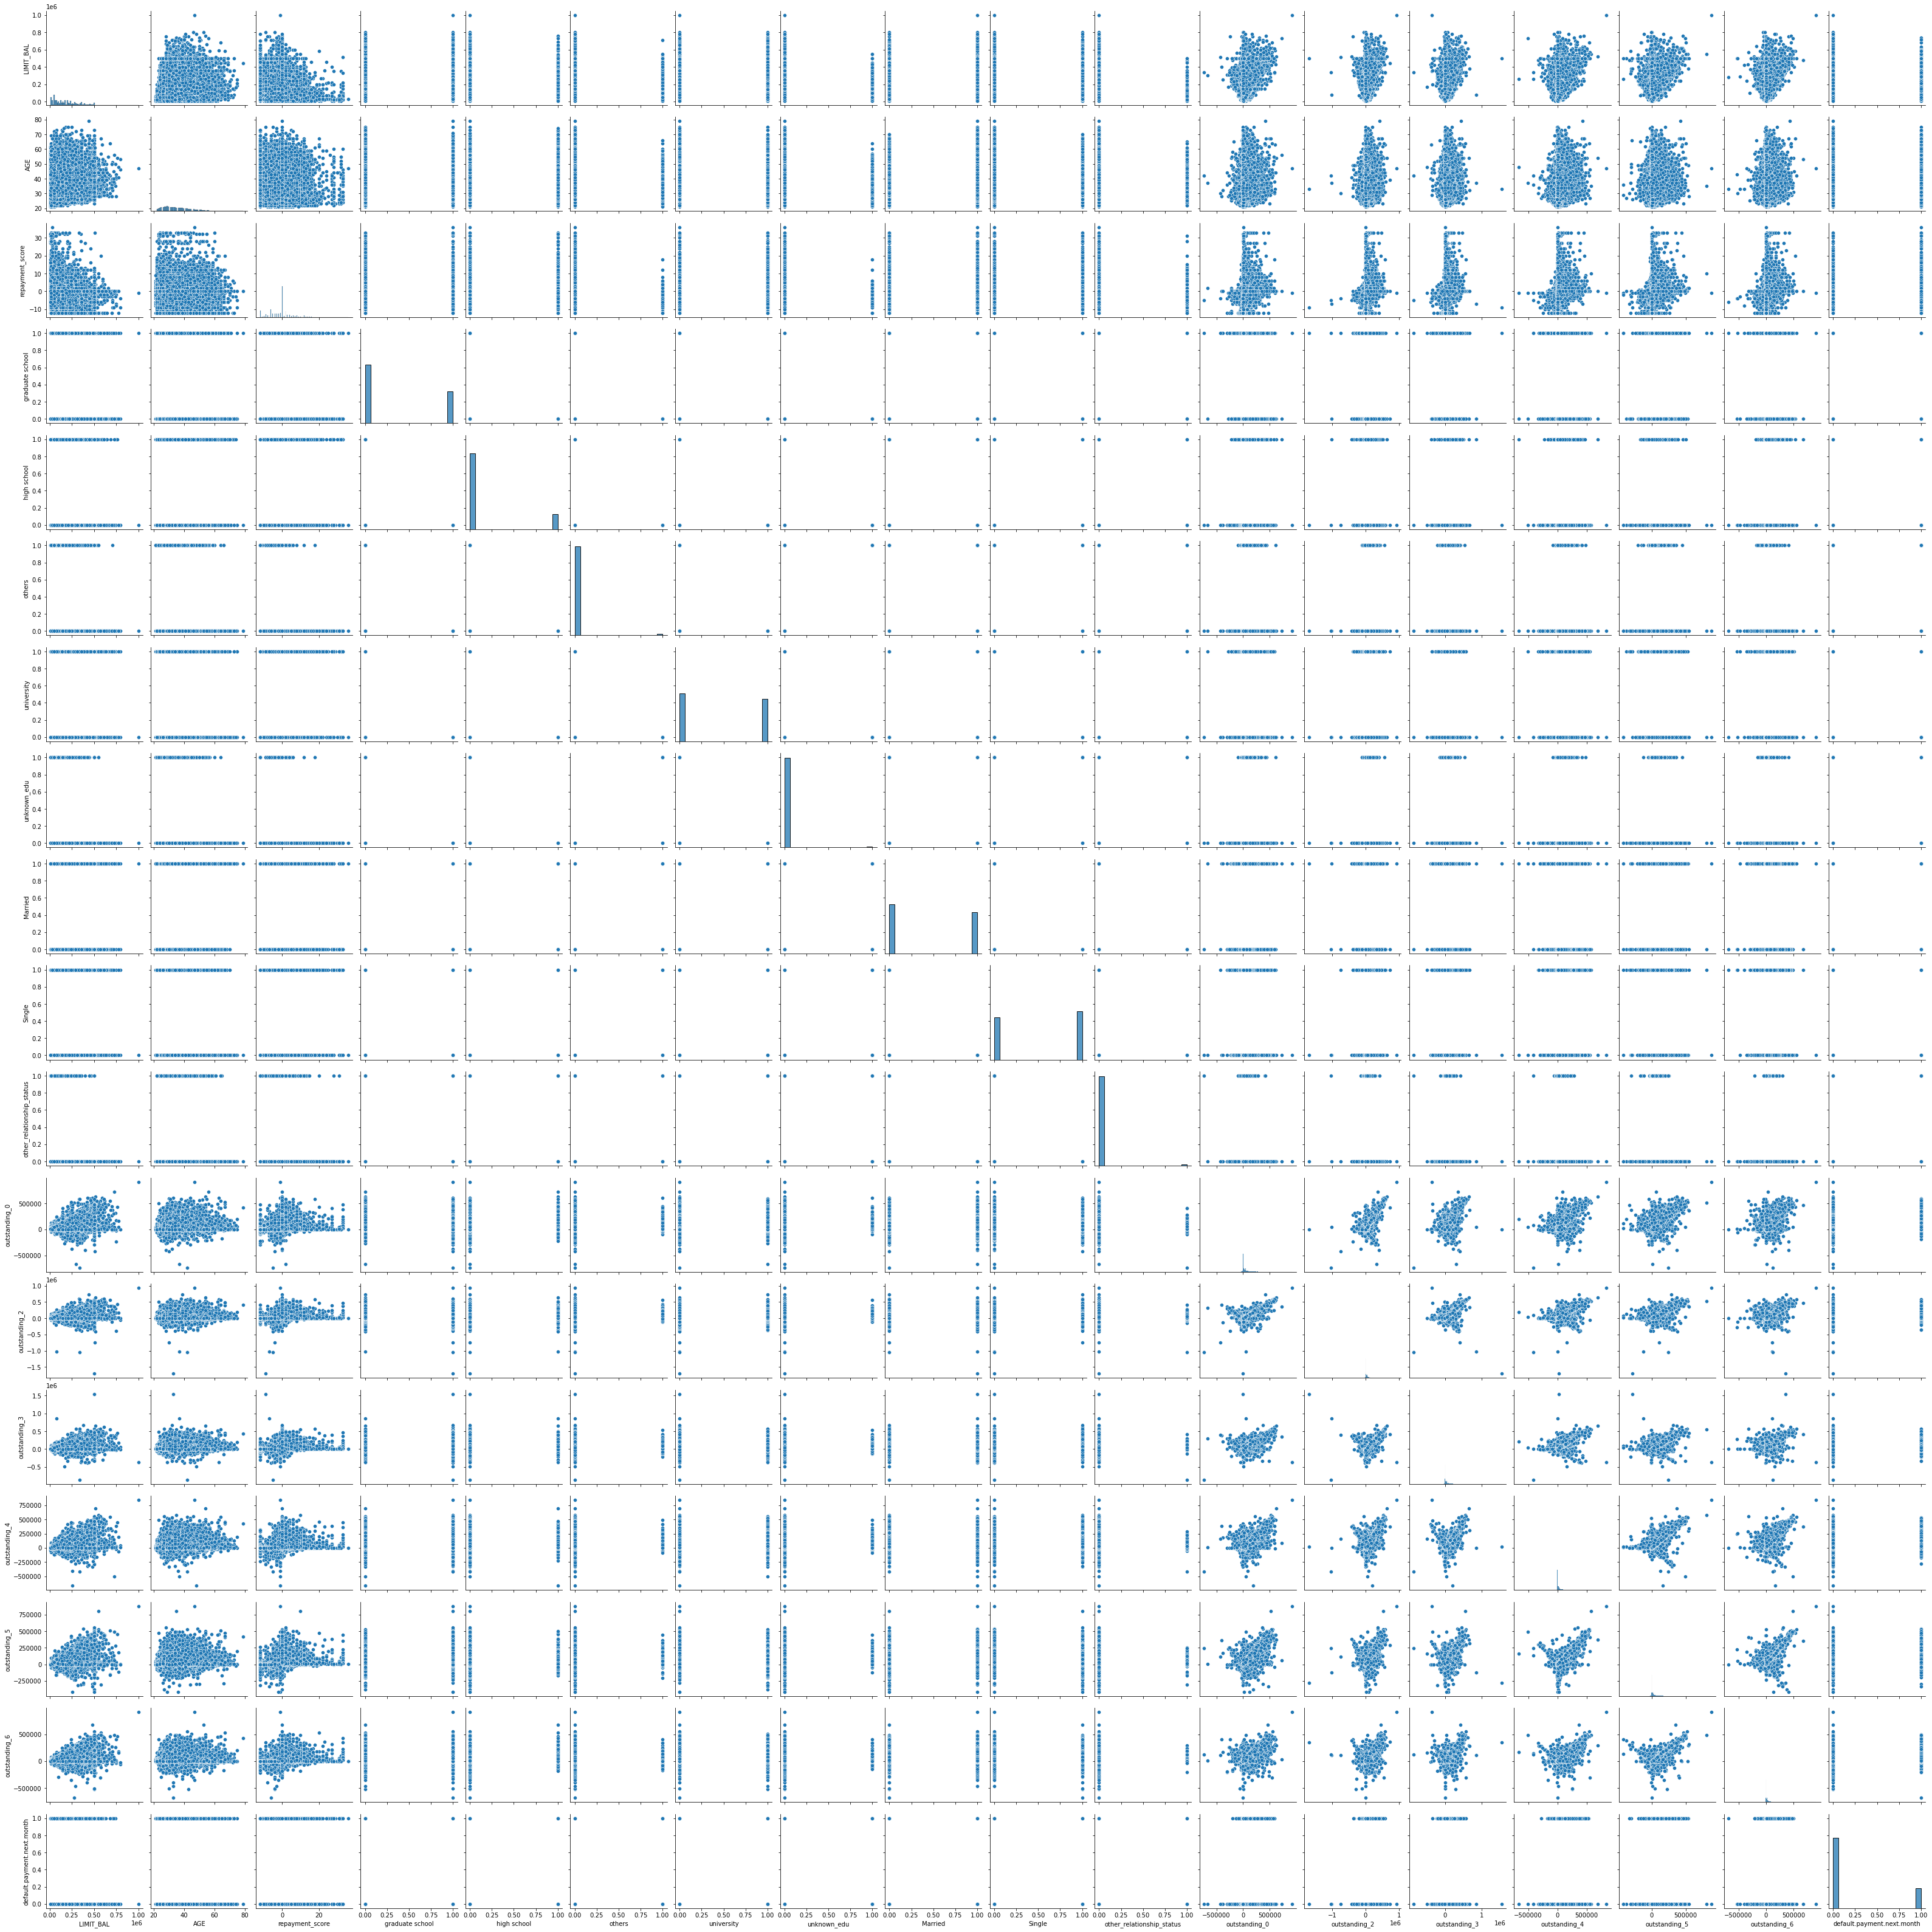

In [28]:
sns.pairplot(df)

## Statistics

In [29]:
df.describe()

,LIMIT_BAL,AGE,repayment_score,graduate school,high school,others,university,unknown_edu,Married,Single,other_relationship_status,outstanding_0,outstanding_2,outstanding_3,outstanding_4,outstanding_5,outstanding_6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,167484.322667,35.485500,-1.094633,0.352833,0.163900,0.015600,0.467667,0.009333,0.455300,0.532133,0.012567,45559.750400,4.325791e+04,4.178747e+04,38436.87210,35512.013333,33656.257833,0.221200
std,129747.661567,9.217904,5.893055,0.477859,0.370191,0.123924,0.498962,0.096159,0.498006,0.498975,0.111396,73173.789447,7.256594e+04,6.929536e+04,64200.61083,60553.370054,60151.290836,0.415062
min,10000.000000,21.000000,-12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-733744.000000,-1.702347e+06,-8.546410e+05,-667000.00000,-414380.000000,-684896.000000,0.000000
25%,50000.000000,28.000000,-5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,745.000000,3.295000e+02,2.627500e+02,230.00000,0.000000,0.000000,0.000000
50%,140000.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18550.500000,1.810250e+04,1.776900e+04,16970.00000,15538.000000,13926.500000,0.000000
75%,240000.000000,41.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,62241.500000,5.907775e+04,5.629425e+04,50259.50000,46961.500000,46067.250000,0.000000
max,1000000.000000,79.000000,36.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,913727.000000,9.332080e+05,1.542258e+06,841586.00000,877171.000000,911408.000000,1.000000


## Test/Split

In [30]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [31]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=42) 

## Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
logistic_model = LogisticRegression()

In [34]:
logistic_model.fit(X_train,y_train)

LogisticRegression()

In [35]:
logistic_model.score(X_test,y_test)

0.7811666666666667

In [36]:
logistic_confusion_M = metrics.confusion_matrix(y_test, logistic_model.predict(X_test), labels=[0,1])
logistic_confusion_M

array([[4687,    0],
       [1313,    0]])

**LR Results**

|                        | **Predicted Not Default** | **Predicted Default** |   |   |
|------------------------|---------------------------|-----------------------|---|---|
| **Actual Not Default** | 4687                      | 0                     |   |   |
| **Actual Default**     | 1313                      | 0                     |   |   |

## Bernoulli Naive Bayes 

In [37]:
from sklearn.naive_bayes import BernoulliNB

In [38]:
b_nb = BernoulliNB()

In [39]:
b_nb.fit(X_train.drop(['LIMIT_BAL', 'AGE', 'repayment_score','outstanding_0', 'outstanding_2', 'outstanding_3', 'outstanding_4',
       'outstanding_5', 'outstanding_6'],axis='columns'),y_train)

BernoulliNB()

In [40]:
b_nb.score(X_test.drop(['LIMIT_BAL', 'AGE', 'repayment_score','outstanding_0', 'outstanding_2', 'outstanding_3', 'outstanding_4',
       'outstanding_5', 'outstanding_6'],axis='columns'),y_test)

0.7811666666666667

In [41]:
b_nb_M = metrics.confusion_matrix(y_test, b_nb.predict(X_test.drop(['LIMIT_BAL', 'AGE', 'repayment_score','outstanding_0', 'outstanding_2', 'outstanding_3', 'outstanding_4',
       'outstanding_5', 'outstanding_6'],axis='columns')), labels=[0,1])
b_nb_M

array([[4687,    0],
       [1313,    0]])

**BNB Results**

|                        | **Predicted Not Default** | **Predicted Default** |   |   |
|------------------------|---------------------------|-----------------------|---|---|
| **Actual Not Default** | 4687                      | 0                     |   |   |
| **Actual Default**     | 1313                      | 0                     |   |   |               

## Decision Tree

In [42]:
dt_model = tree.DecisionTreeClassifier(max_depth=3)

In [43]:
dt_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [44]:
dt_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [45]:
dt_model.score(X_test,y_test)

0.8075

In [46]:
dt_model_M = metrics.confusion_matrix(y_test, dt_model.predict(X_test), labels=[0,1])
dt_model_M

array([[4461,  226],
       [ 929,  384]])

**DT Results**

|                        | **Predicted Not Default** | **Predicted Default** |   |   |
|------------------------|---------------------------|-----------------------|---|---|
| **Actual Not Default** | 4461                      | 226                   |   |   |
| **Actual Default**     | 929                       | 384                   |   |   |

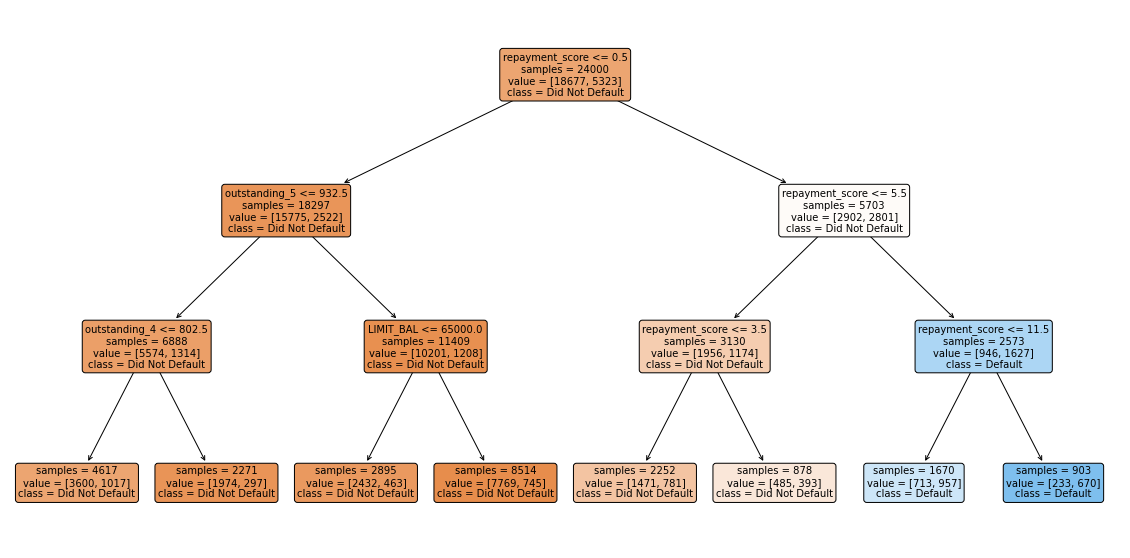

In [47]:
fig, ax = plt.subplots(figsize=(20,10))

tree.plot_tree(dt_model,
               feature_names = X_train.columns,
               class_names = ['Did Not Default','Default'],
               rounded = True,
               impurity = False,
               filled = True,
               ax = ax,
               fontsize = 10);

## Random Forrest

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
rf = RandomForestClassifier(n_estimators=250)

In [50]:
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=250)

In [51]:
rf.score(X_test,y_test)

0.8013333333333333

In [52]:
rf_M = metrics.confusion_matrix(y_test, rf.predict(X_test), labels=[0,1])
rf_M

array([[4407,  280],
       [ 912,  401]])

|                        | **Predicted Not Default** | **Predicted Default** |   |   |
|------------------------|---------------------------|-----------------------|---|---|
| **Actual Not Default** | 4402                      | 285                   |   |   |
| **Actual Default**     | 911                       | 402                   |   |   |

## Results

The decision tree model performed better than the random forrest, Bernoulli NB and logistic regression models according to the confusion matrix and accuracy scores. 

**Looking ahead**

Possible improvements can be transforming predictor variables to better fit the random forrest, logistic and Bernoulli models. 